In [3]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
df = pd.read_parquet("../data/processed/features_v0.parquet")
df.head()

,indication/disease area,"rare, non-rare (established disease area and clear diagnosis criteria)","mode of administration (ex. NBE, NCE, iv vs pill)",disease modifying or treating symptoms,population - adults vs peds,phase,# patients,primary_outcomes,secondary_outcomes,other_outcomes,...,condition_top,intervention_type,start_year,country_n,site_n,assessments_n,assessments_complexity,screen fail rate,evaluability / drop out rate,safety events
0,Infertility,"[{'abbrev': 'BXS', 'name': 'Urinary Tract, Sex...",DRUG,TREATMENT,[ADULT],Phase 4,28.0,"[{'description': None, 'measure': 'Number of o...","[{'description': None, 'measure': 'Number of e...",None,...,Infertility,DRUG,2015.0,0,0,0,Low,NaN,NaN,NaN
1,Pompe Disease,"[{'abbrev': 'BC10', 'name': 'Nervous System Di...",DRUG,TREATMENT,"[ADULT, OLDER_ADULT]",Phase 2,25.0,[{'description': 'A TEAE was defined as an adv...,[{'description': 'The total GAA activity in sk...,None,...,Pompe Disease,DRUG,2011.0,0,0,0,Low,NaN,NaN,NaN
2,Stress Urinary Incontinence,"[{'abbrev': 'BXS', 'name': 'Urinary Tract, Sex...",OTHER,TREATMENT,"[ADULT, OLDER_ADULT]",Unknown,100.0,"[{'description': 'Changes in the ""frequency of...",None,None,...,Stress Urinary Incontinence,OTHER,2023.0,0,0,0,Low,NaN,NaN,NaN
3,Internet-Based Intervention,"[{'abbrev': 'BXM', 'name': 'Behaviors and Ment...",OTHER,TREATMENT,"[ADULT, OLDER_ADULT]",Unknown,697.0,[{'description': 'Change in the 16-item Malada...,[{'description': 'Change in the Brief Symptom ...,[{'description': 'Change in the Mindful Attent...,...,Internet-Based Intervention,OTHER,2018.0,0,0,0,Low,NaN,NaN,NaN
4,Cancer,"[{'abbrev': 'BC04', 'name': 'Neoplasms'}, {'ab...",DRUG,TREATMENT,"[ADULT, OLDER_ADULT]",Phase 1,23.0,[{'description': 'Blood samples will be collec...,[{'description': 'Blood samples will be collec...,None,...,Cancer,DRUG,2013.0,0,0,0,Low,NaN,NaN,NaN


## Missing Data


<class 'pandas.core.frame.DataFrame'>
Int64Index: 508813 entries, 0 to 538874
Data columns (total 40 columns):
 #   Column                                                                                           Non-Null Count   Dtype         
---  ------                                                                                           --------------   -----         
 0   indication/disease area                                                                          508810 non-null  object        
 1   rare, non-rare (established disease area and clear diagnosis criteria)                           446202 non-null  object        
 2   mode of administration (ex. NBE, NCE, iv vs pill)                                                462323 non-null  object        
 3   disease modifying or treating symptoms                                                           386896 non-null  object        
 4   population - adults vs peds                                                     

None

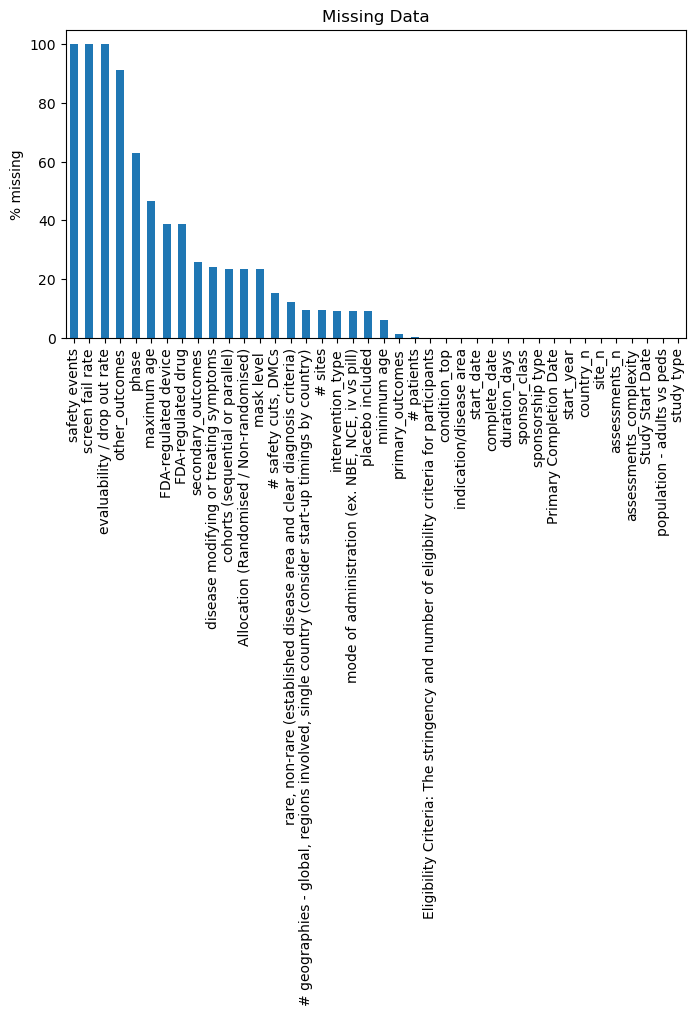

,missing_rows,pct_missing
safety events,508813,100.000000
screen fail rate,508813,100.000000
evaluability / drop out rate,508813,100.000000
other_outcomes,465060,91.400967
phase,320455,62.980899
maximum age,237167,46.611820
FDA-regulated device,197365,38.789300
FDA-regulated drug,197298,38.776132
secondary_outcomes,131332,25.811447
disease modifying or treating symptoms,121917,23.961062


In [6]:
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd

# Make a temporary copy where phase=="Unknown" is NaN
tmp = df.copy()
if "phase" in tmp.columns:
    tmp.loc[tmp["phase"] == "Unknown", "phase"] = pd.NA   # or np.nan


# Standard DataFrame info with counts
display(tmp.info(show_counts=True))

# Missing-percentage bar plot
miss = tmp.isna().mean().sort_values(ascending=False) * 100
miss.head(40).plot.bar(figsize=(8,4))
plt.ylabel("% missing")
plt.title("Missing Data")
plt.show()

# Table with absolute & % missing
miss_tbl = pd.DataFrame({
    "missing_rows": tmp.isna().sum(),
    "pct_missing":  miss
}).sort_values("pct_missing", ascending=False)

display(miss_tbl.head(40)) # show top-40 variables


## Trials per Phase


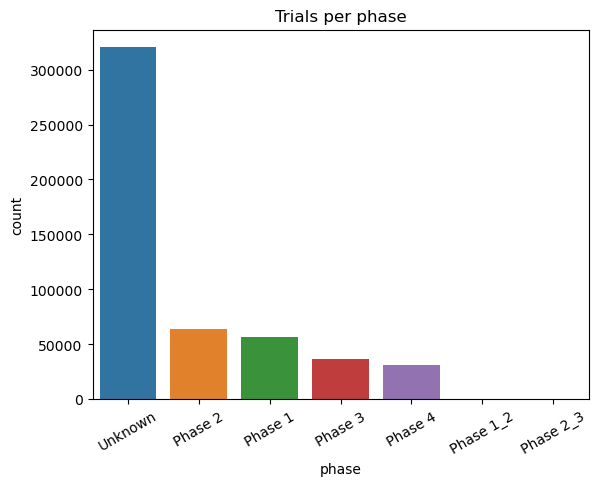

In [6]:
sns.countplot(data=df, x="phase", order=df["phase"].value_counts().index)
plt.xticks(rotation=30); plt.title("Trials per phase"); plt.show()

## Duration by phase

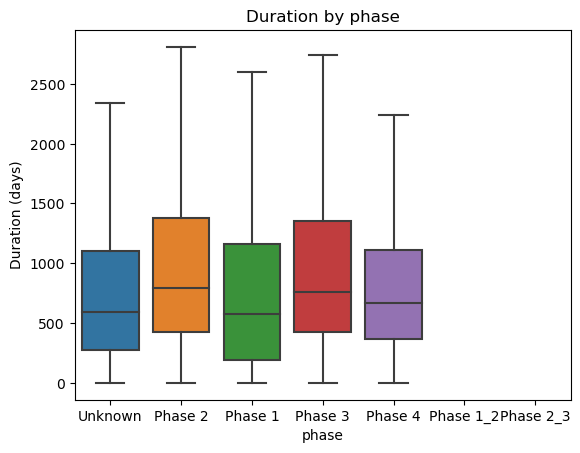

In [7]:
sns.boxplot(data=df, x="phase", y="duration_days",
            order=df["phase"].value_counts().index, showfliers=False)
plt.ylabel("Duration (days)"); plt.title("Duration by phase"); plt.show()

In [9]:
print(sorted(df.columns))

num_actual = df.select_dtypes(include="number").columns.tolist()
print(num_actual)

['# geographies - global, regions involved, single country (consider start-up timings by country)', '# patients', '# safety cuts, DMCs', '# sites', 'Allocation (Randomised / Non-randomised)', 'Eligibility Criteria: The stringency and number of eligibility criteria for participants', 'FDA-regulated device', 'FDA-regulated drug', 'Primary Completion Date', 'Study Start Date', 'assessments_complexity', 'assessments_n', 'cohorts (sequential or parallel)', 'complete_date', 'condition_top', 'country_n', 'disease modifying or treating symptoms', 'duration_days', 'evaluability / drop out rate', 'indication/disease area', 'intervention_type', 'mask level ', 'maximum age', 'minimum age', 'mode of administration (ex. NBE, NCE, iv vs pill)', 'other_outcomes', 'phase', 'placebo included', 'population - adults vs peds', 'primary_outcomes', 'rare, non-rare (established disease area and clear diagnosis criteria)', 'safety events', 'screen fail rate', 'secondary_outcomes', 'site_n', 'sponsor_class', 's

## Duration by Phase and Sponsor Class


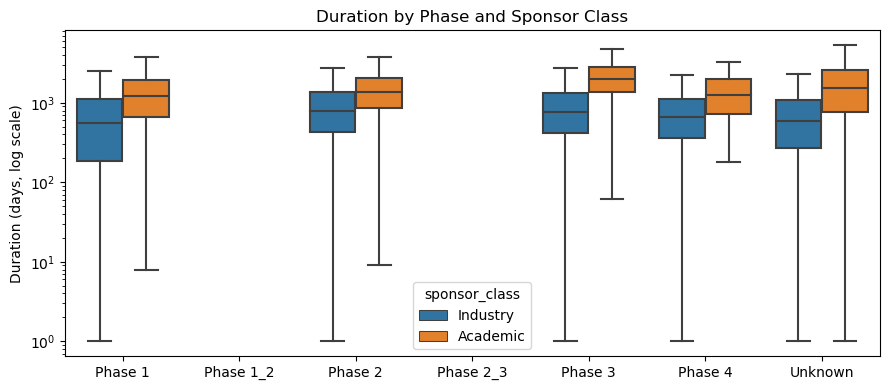

In [18]:
plt.figure(figsize=(9,4))
sns.boxplot(data=df, x="phase", y="duration_days",
            hue="sponsor_class", showfliers=False,
            order=["Phase 1","Phase 1_2","Phase 2","Phase 2_3","Phase 3","Phase 4","Unknown"])
plt.yscale("log")
plt.title("Duration by Phase and Sponsor Class")
plt.ylabel("Duration (days, log scale)")
plt.xlabel("")
plt.tight_layout(); plt.show()


## Trial Duration by Start Year 


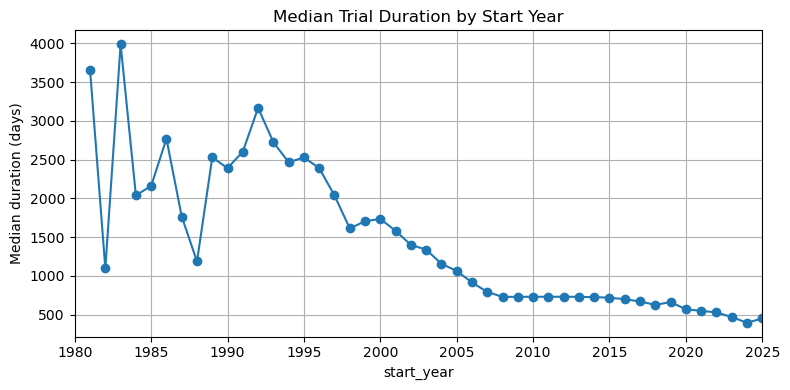

In [5]:
# keep only trials between 1980 and 2025
lower_year = 1980
cutoff_year = 2025
# Filter rows whose start_year is in the desired interval
mask = (df["start_year"] >= lower_year) & (df["start_year"] <= cutoff_year)
df_plot = df[mask]

# Plot median duration by start year
ax = (df_plot.groupby("start_year")["duration_days"]
          .median()
          .plot(marker="o", figsize=(8, 4)))

ax.set_ylabel("Median duration (days)")
ax.set_title("Median Trial Duration by Start Year")
ax.set_xlim(lower_year, cutoff_year)   # keep the x-axis tight to the interval
ax.grid(True)
plt.tight_layout()
plt.show()


## Trial Duration 


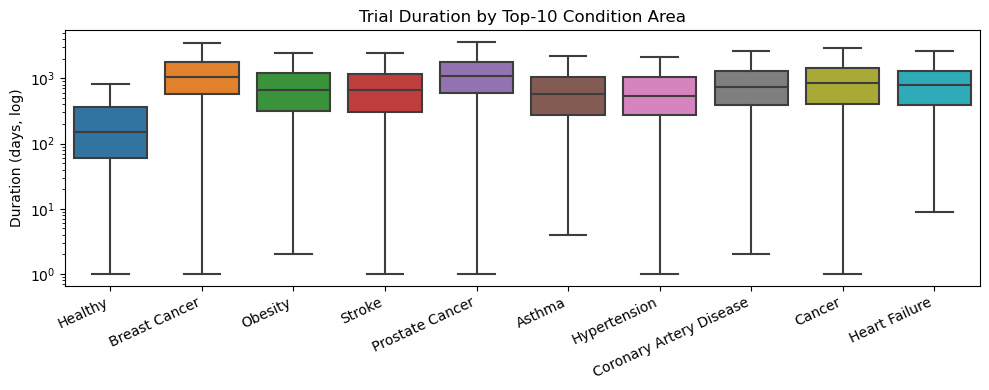

In [24]:
top10 = df["condition_top"].value_counts().index[:10]
sub   = df[df["condition_top"].isin(top10)]

plt.figure(figsize=(10,4))
sns.boxplot(data=sub, x="condition_top", y="duration_days",
            showfliers=False,
            order=top10)
plt.yscale("log")
plt.xticks(rotation=25, ha="right"); plt.xlabel("")
plt.ylabel("Duration (days, log)")
plt.title("Trial Duration by Top-10 Condition Area")
plt.tight_layout(); plt.show()


## Pairwise Pearson correlations of numeric features


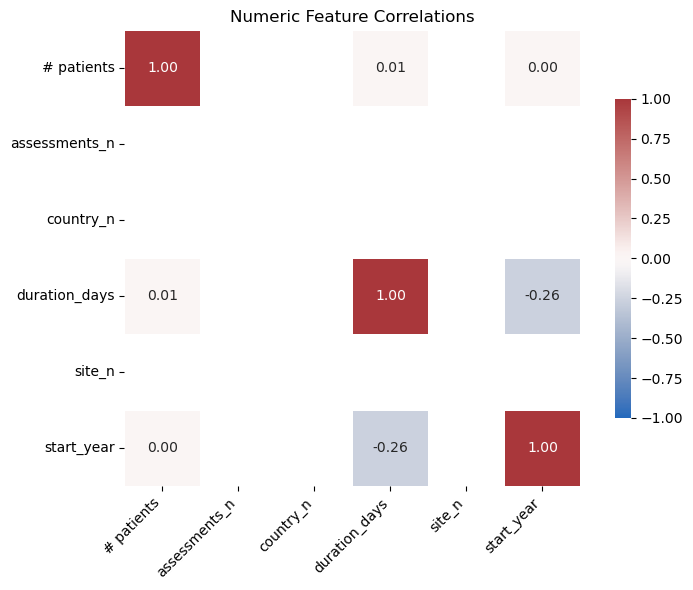

In [25]:
num_cols = (df.select_dtypes(include="number")
              .columns
              .difference(["screen fail rate",
                           "evaluability / drop out rate",
                           "safety events"]))
corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag",
            linewidths=.5, square=True, vmin=-1, vmax=1,
            cbar_kws={"shrink":.7})
plt.xticks(rotation=45, ha="right")
plt.title("Numeric Feature Correlations")
plt.tight_layout(); plt.show()


In [7]:
# new EDA cells ----------------------------------------------------
import matplotlib.pyplot as plt, seaborn as sns, numpy as np, pandas as pd

df = pd.read_parquet("data/processed/features_2015plus.parquet")
figdir = pathlib.Path("reports/figures/2015plus"); figdir.mkdir(parents=True, exist_ok=True)

# patients
plt.figure(); sns.histplot(df["# patients"].dropna(), log_scale=True); plt.title("# Patients (log)"); 
plt.tight_layout(); plt.savefig(figdir/"patients_hist.png", dpi=150); plt.close()

# FDA regulated device/drug
plt.figure(); sns.countplot(x="FDA-regulated drug", data=df); 
plt.title("FDA-regulated drug flag"); plt.tight_layout();
plt.savefig(figdir/"fda_drug_flag.png", dpi=150); plt.close()

# intervention types
top_int = (df["intervention_type"]
           .value_counts().head(15).reset_index())
plt.figure(figsize=(6,4)); sns.barplot(data=top_int, y="index", x="intervention_type");
plt.xlabel("Trials"); plt.ylabel("Intervention type");
plt.tight_layout(); plt.savefig(figdir/"top_interventions.png", dpi=150); plt.close()


FileNotFoundError: [Errno 2] No such file or directory: 'data/processed/features_2015plus.parquet'